**About the data**

This dataset contains information on energy consumption and various weather parameters such as solar radiation, temperature, pressure, humidity, wind speed, and precipitation. The "Energy delta[Wh]" column represents the change in energy consumption over a certain time period, while the "GHI" column measures the Global Horizontal Irradiance, which is the amount of solar radiation received by a horizontal surface. The dataset also includes information on the presence of sunlight ("isSun"), the length of daylight ("dayLength"), and the amount of time during which sunlight is available ("sunlightTime"). The "weather_type" column provides information on the overall weather conditions such as clear, cloudy, or rainy. The dataset is organized by hour and month, making it ideal for studying the relationship between renewable energy generation and weather patterns over time.

This text above is taken from the source of the data:
https://www.kaggle.com/code/totoro29/renewable-energy-analysis

I'd like to investigate the relationship between the consumption of energy and how it is affected by the changing weather conditions. This is relevant information to be able to forecast and anticipate the potential renewable energy demand depending on the different weather conditions. 

In [56]:
#import pandas, numpy, matlab, seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


In [202]:
# Read in file. Source data: Kaggle. Name: Renewable Energy

df = pd.read_csv('/Users/claudiazaffaroni/Desktop/Springboard_Data_Science_Course/Unit 11_PythonStatisticsinEDA/Capstone 2 EDA/solar_weather.csv')

In [203]:
# Take a look at the first few rows

df.head()

Time  Energy delta[Wh]  GHI  temp  pressure  humidity  \
0  2017-01-01 00:00:00                 0  0.0   1.6      1021       100   
1  2017-01-01 00:15:00                 0  0.0   1.6      1021       100   
2  2017-01-01 00:30:00                 0  0.0   1.6      1021       100   
3  2017-01-01 00:45:00                 0  0.0   1.6      1021       100   
4  2017-01-01 01:00:00                 0  0.0   1.7      1020       100   

   wind_speed  rain_1h  snow_1h  clouds_all  isSun  sunlightTime  dayLength  \
0         4.9      0.0      0.0         100      0             0        450   
1         4.9      0.0      0.0         100      0             0        450   
2         4.9      0.0      0.0         100      0             0        450   
3         4.9      0.0      0.0         100      0             0        450   
4         5.2      0.0      0.0         100      0             0        450   

   SunlightTime/daylength  weather_type  hour  month  
0                     0.0             4     0      1  
1                     0.0             4     0      1  
2                     0.0             4     0      1  
3                     0.0             4     0      1  
4                     0.0             4     1      1

In [204]:
#Call the info method on df to see a summary of the columns and data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196776 entries, 0 to 196775
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Time                    196776 non-null  object 
 1   Energy delta[Wh]        196776 non-null  int64  
 2   GHI                     196776 non-null  float64
 3   temp                    196776 non-null  float64
 4   pressure                196776 non-null  int64  
 5   humidity                196776 non-null  int64  
 6   wind_speed              196776 non-null  float64
 7   rain_1h                 196776 non-null  float64
 8   snow_1h                 196776 non-null  float64
 9   clouds_all              196776 non-null  int64  
 10  isSun                   196776 non-null  int64  
 11  sunlightTime            196776 non-null  int64  
 12  dayLength               196776 non-null  int64  
 13  SunlightTime/daylength  196776 non-null  float64
 14  weather_type        

In [205]:
#Call the describe method on df to see a summary of the data, including count, mean, std, min and max

df.describe()

Energy delta[Wh]            GHI           temp       pressure  \
count     196776.000000  196776.000000  196776.000000  196776.000000   
mean         573.008228      32.596538       9.790521    1015.292780   
std         1044.824047      52.172018       7.995428       9.585773   
min            0.000000       0.000000     -16.600000     977.000000   
25%            0.000000       0.000000       3.600000    1010.000000   
50%            0.000000       1.600000       9.300000    1016.000000   
75%          577.000000      46.800000      15.700000    1021.000000   
max         5020.000000     229.200000      35.800000    1047.000000   

            humidity     wind_speed        rain_1h        snow_1h  \
count  196776.000000  196776.000000  196776.000000  196776.000000   
mean       79.810566       3.937746       0.066035       0.007148   
std        15.604459       1.821694       0.278913       0.069710   
min        22.000000       0.000000       0.000000       0.000000   
25%        70.000000       2.600000       0.000000       0.000000   
50%        84.000000       3.700000       0.000000       0.000000   
75%        92.000000       5.000000       0.000000       0.000000   
max       100.000000      14.300000       8.090000       2.820000   

          clouds_all          isSun   sunlightTime      dayLength  \
count  196776.000000  196776.000000  196776.000000  196776.000000   
mean       65.974387       0.519962     211.721094     748.644347   
std        36.628593       0.499603     273.902186     194.870208   
min         0.000000       0.000000       0.000000     450.000000   
25%        34.000000       0.000000       0.000000     570.000000   
50%        82.000000       1.000000      30.000000     765.000000   
75%       100.000000       1.000000     390.000000     930.000000   
max       100.000000       1.000000    1020.000000    1020.000000   

       SunlightTime/daylength   weather_type           hour          month  
count           196776.000000  196776.000000  196776.000000  196776.000000  
mean                 0.265187       3.198398      11.498902       6.298329  
std                  0.329023       1.289939       6.921887       3.376066  
min                  0.000000       1.000000       0.000000       1.000000  
25%                  0.000000       2.000000       5.000000       3.000000  
50%                  0.050000       4.000000      11.000000       6.000000  
75%                  0.530000       4.000000      17.000000       9.000000  
max                  1.000000       5.000000      23.000000      12.000000

Looking at the head, info and describe methods, time is one of the columns I might need to adjust the data type since it is an object now. I also may want to examine the columns that are data type int64.

**Looking for Missing Values**

In [206]:
# Find how many have null values

df.isna().sum()

Time                      0
Energy delta[Wh]          0
GHI                       0
temp                      0
pressure                  0
humidity                  0
wind_speed                0
rain_1h                   0
snow_1h                   0
clouds_all                0
isSun                     0
sunlightTime              0
dayLength                 0
SunlightTime/daylength    0
weather_type              0
hour                      0
month                     0
dtype: int64

There is no missing data in any of the columns

**Cleaning Data**

I'll change the data type of the time column

In [207]:
df['Time'] = pd.to_datetime(df['Time'])
df.head(10)

Time  Energy delta[Wh]  GHI  temp  pressure  humidity  \
0 2017-01-01 00:00:00                 0  0.0   1.6      1021       100   
1 2017-01-01 00:15:00                 0  0.0   1.6      1021       100   
2 2017-01-01 00:30:00                 0  0.0   1.6      1021       100   
3 2017-01-01 00:45:00                 0  0.0   1.6      1021       100   
4 2017-01-01 01:00:00                 0  0.0   1.7      1020       100   
5 2017-01-01 01:15:00                 0  0.0   1.7      1020       100   
6 2017-01-01 01:30:00                 0  0.0   1.7      1020       100   
7 2017-01-01 01:45:00                 0  0.0   1.7      1020       100   
8 2017-01-01 02:00:00                 0  0.0   1.9      1020       100   
9 2017-01-01 02:15:00                 0  0.0   1.9      1020       100   

   wind_speed  rain_1h  snow_1h  clouds_all  isSun  sunlightTime  dayLength  \
0         4.9      0.0      0.0         100      0             0        450   
1         4.9      0.0      0.0         100      0             0        450   
2         4.9      0.0      0.0         100      0             0        450   
3         4.9      0.0      0.0         100      0             0        450   
4         5.2      0.0      0.0         100      0             0        450   
5         5.2      0.0      0.0         100      0             0        450   
6         5.2      0.0      0.0         100      0             0        450   
7         5.2      0.0      0.0         100      0             0        450   
8         5.5      0.0      0.0         100      0             0        450   
9         5.5      0.0      0.0         100      0             0        450   

   SunlightTime/daylength  weather_type  hour  month  
0                     0.0             4     0      1  
1                     0.0             4     0      1  
2                     0.0             4     0      1  
3                     0.0             4     0      1  
4                     0.0             4     1      1  
5                     0.0             4     1      1  
6                     0.0             4     1      1  
7                     0.0             4     1      1  
8                     0.0             4     2      1  
9                     0.0             4     2      1

In [208]:
# Check the change

df.dtypes

Time                      datetime64[ns]
Energy delta[Wh]                   int64
GHI                              float64
temp                             float64
pressure                           int64
humidity                           int64
wind_speed                       float64
rain_1h                          float64
snow_1h                          float64
clouds_all                         int64
isSun                              int64
sunlightTime                       int64
dayLength                          int64
SunlightTime/daylength           float64
weather_type                       int64
hour                               int64
month                              int64
dtype: object

In [209]:
# Check the shape of the data set

df.shape

(196776, 17)

In [210]:
# Set the "Time" column as the index of the DataFrame
df.set_index("Time", inplace=True)

In [211]:
df.head(10)

Energy delta[Wh]  GHI  temp  pressure  humidity  \
Time                                                                   
2017-01-01 00:00:00                 0  0.0   1.6      1021       100   
2017-01-01 00:15:00                 0  0.0   1.6      1021       100   
2017-01-01 00:30:00                 0  0.0   1.6      1021       100   
2017-01-01 00:45:00                 0  0.0   1.6      1021       100   
2017-01-01 01:00:00                 0  0.0   1.7      1020       100   
2017-01-01 01:15:00                 0  0.0   1.7      1020       100   
2017-01-01 01:30:00                 0  0.0   1.7      1020       100   
2017-01-01 01:45:00                 0  0.0   1.7      1020       100   
2017-01-01 02:00:00                 0  0.0   1.9      1020       100   
2017-01-01 02:15:00                 0  0.0   1.9      1020       100   

                     wind_speed  rain_1h  snow_1h  clouds_all  isSun  \
Time                                                                   
2017-01-01 00:00:00         4.9      0.0      0.0         100      0   
2017-01-01 00:15:00         4.9      0.0      0.0         100      0   
2017-01-01 00:30:00         4.9      0.0      0.0         100      0   
2017-01-01 00:45:00         4.9      0.0      0.0         100      0   
2017-01-01 01:00:00         5.2      0.0      0.0         100      0   
2017-01-01 01:15:00         5.2      0.0      0.0         100      0   
2017-01-01 01:30:00         5.2      0.0      0.0         100      0   
2017-01-01 01:45:00         5.2      0.0      0.0         100      0   
2017-01-01 02:00:00         5.5      0.0      0.0         100      0   
2017-01-01 02:15:00         5.5      0.0      0.0         100      0   

                     sunlightTime  dayLength  SunlightTime/daylength  \
Time                                                                   
2017-01-01 00:00:00             0        450                     0.0   
2017-01-01 00:15:00             0        450                     0.0   
2017-01-01 00:30:00             0        450                     0.0   
2017-01-01 00:45:00             0        450                     0.0   
2017-01-01 01:00:00             0        450                     0.0   
2017-01-01 01:15:00             0        450                     0.0   
2017-01-01 01:30:00             0        450                     0.0   
2017-01-01 01:45:00             0        450                     0.0   
2017-01-01 02:00:00             0        450                     0.0   
2017-01-01 02:15:00             0        450                     0.0   

                     weather_type  hour  month  
Time                                            
2017-01-01 00:00:00             4     0      1  
2017-01-01 00:15:00             4     0      1  
2017-01-01 00:30:00             4     0      1  
2017-01-01 00:45:00             4     0      1  
2017-01-01 01:00:00             4     1      1  
2017-01-01 01:15:00             4     1      1  
2017-01-01 01:30:00             4     1      1  
2017-01-01 01:45:00             4     1      1  
2017-01-01 02:00:00             4     2      1  
2017-01-01 02:15:00             4     2      1

In [220]:
df.rename(columns={"Energy delta[Wh]": "Energy_delta[Wh]"}, inplace=True)
df.head(5)

Energy_delta[Wh]  GHI  temp  pressure  humidity  \
Time                                                                   
2017-01-01 00:00:00                 0  0.0   1.6      1021       100   
2017-01-01 00:15:00                 0  0.0   1.6      1021       100   
2017-01-01 00:30:00                 0  0.0   1.6      1021       100   
2017-01-01 00:45:00                 0  0.0   1.6      1021       100   
2017-01-01 01:00:00                 0  0.0   1.7      1020       100   

                     wind_speed  rain_1h  snow_1h  clouds_all  isSun  \
Time                                                                   
2017-01-01 00:00:00         4.9      0.0      0.0         100      0   
2017-01-01 00:15:00         4.9      0.0      0.0         100      0   
2017-01-01 00:30:00         4.9      0.0      0.0         100      0   
2017-01-01 00:45:00         4.9      0.0      0.0         100      0   
2017-01-01 01:00:00         5.2      0.0      0.0         100      0   

                     sunlightTime  dayLength  SunlightTime/daylength  \
Time                                                                   
2017-01-01 00:00:00             0        450                     0.0   
2017-01-01 00:15:00             0        450                     0.0   
2017-01-01 00:30:00             0        450                     0.0   
2017-01-01 00:45:00             0        450                     0.0   
2017-01-01 01:00:00             0        450                     0.0   

                     weather_type  hour  month  
Time                                            
2017-01-01 00:00:00             4     0      1  
2017-01-01 00:15:00             4     0      1  
2017-01-01 00:30:00             4     0      1  
2017-01-01 00:45:00             4     0      1  
2017-01-01 01:00:00             4     1      1

### Summarize the data visually

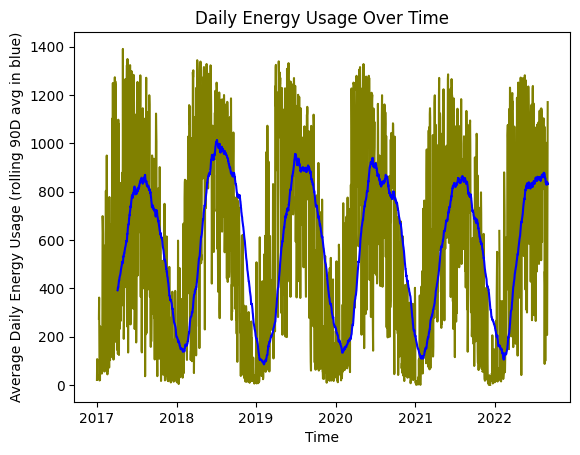

In [240]:
# Resample the data to a daily frequency and calculate the average energy usage
daily_energy = df["Energy_delta[Wh]"].resample("D").mean()

# Calculate a rolling 90 day average
ninetyday_rolling_avg = df['Energy_delta[Wh]'].rolling(8640).mean()

# Plot the daily energy usage over time
plt.plot(daily_energy.index, daily_energy.values, color='olive')
plt.plot(ninetyday_rolling_avg.index, ninetyday_rolling_avg.values, color='blue')
plt.title("Daily Energy Usage Over Time")
plt.xlabel("Time")
plt.ylabel("Average Daily Energy Usage (rolling 90D avg in blue)")
plt.show()

The peaks seem to be getting slightly lower each year since 2018, this is demostrated by the rolling moving average in the chart, the blue line.

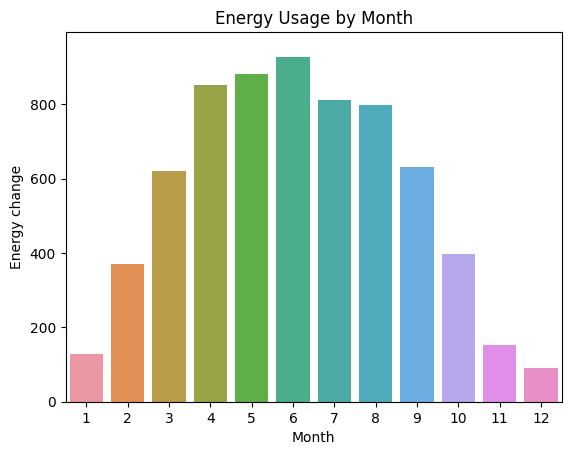

In [241]:
# Take a look at the energy usage by month since this data has seasonality

_ = sns.barplot(x=df['month'], y=df['Energy_delta[Wh]'], errwidth=0)
_ = plt.title('Energy Usage by Month')
_ = plt.xlabel('Month')
_ = plt.ylabel('Energy change')

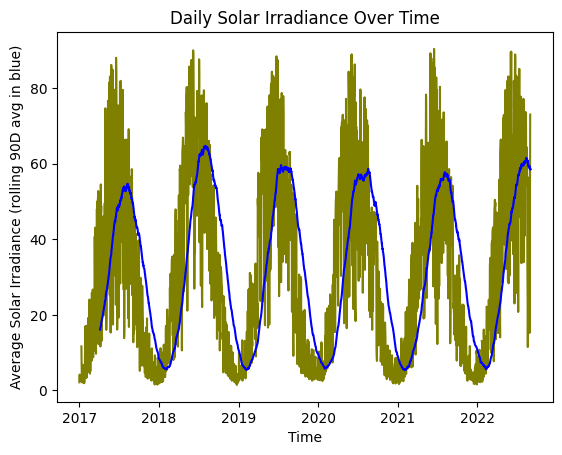

In [242]:
# Resample the data to a daily frequency and calculate the average Solar Irradiance
daily_GHI = df["GHI"].resample("D").mean()

# Calculate a rolling 90 day average
ninetyday_rolling_avg_GHI = df['GHI'].rolling(8640).mean()

# Plot the daily solar irradiance over time
plt.plot(daily_GHI.index, daily_GHI.values, color='olive')
plt.plot(ninetyday_rolling_avg_GHI.index, ninetyday_rolling_avg_GHI.values, color='blue')
plt.title("Daily Solar Irradiance Over Time")
plt.xlabel("Time")
plt.ylabel("Average Solar Irradiance (rolling 90D avg in blue)")
plt.show()

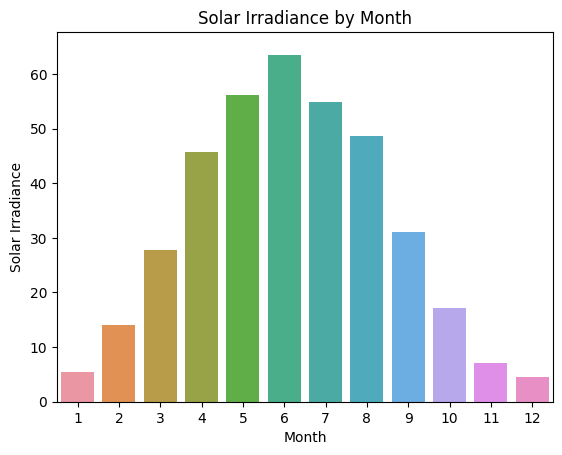

In [243]:
# Now lets look at the Solar Irradiance measured by the GHI (Global Horizontal Irradiance) by month

_ = sns.barplot(x=df['month'], y=df['GHI'], errwidth=0)
_ = plt.title('Solar Irradiance by Month')
_ = plt.xlabel('Month')
_ = plt.ylabel('Solar Irradiance')

There is a very similar pattern between energy usage and sun irradiation, which could be utilized to generate
renewable energy 

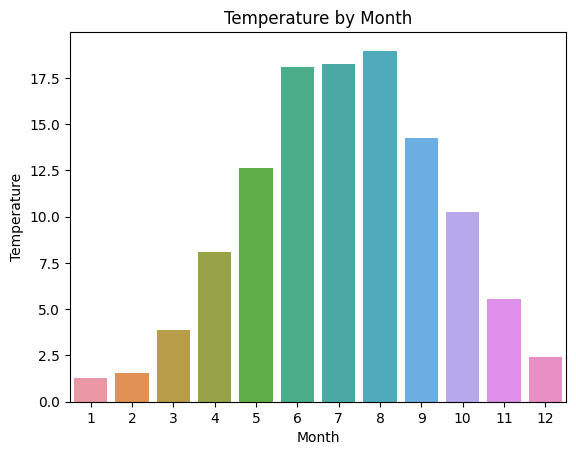

In [192]:
# Now lets look at the Temperature by month

_ = sns.barplot(x=df['month'], y=df['temp'], errwidth=0)
_ = plt.title('Temperature by Month')
_ = plt.xlabel('Month')
_ = plt.ylabel('Temperature')

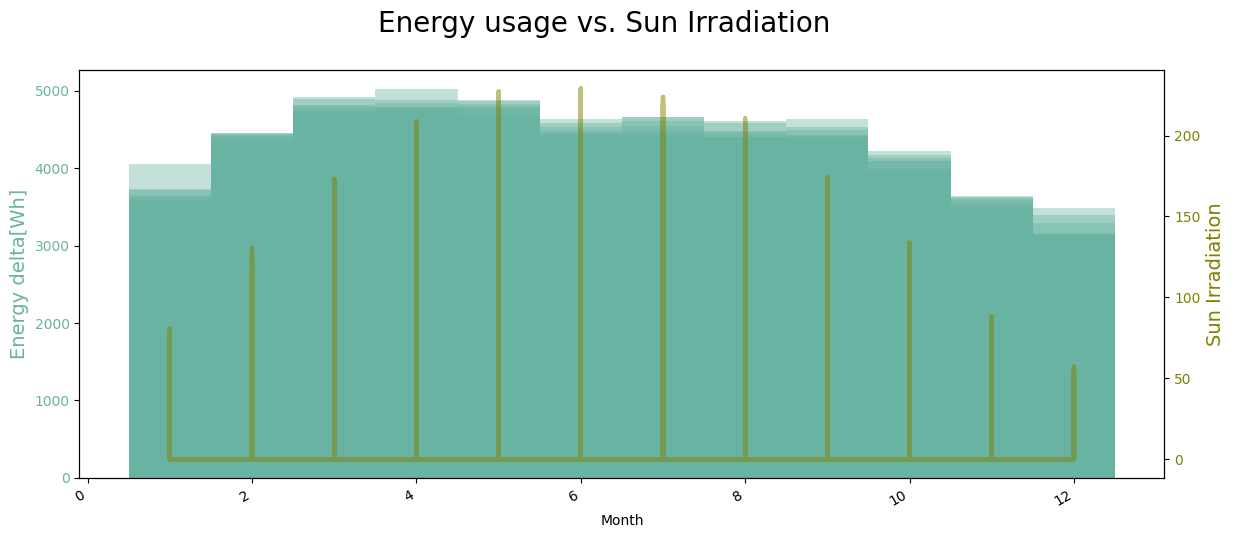

In [193]:
# Take a look at both variables plotted together

COLOR_ENERGY = "#69b3a2"
COLOR_SUN = 'olive'

fig, ax1 = plt.subplots(figsize=(14, 6))
ax2 = ax1.twinx()

ax1.bar(df['month'], df['Energy delta[Wh]'], color=COLOR_ENERGY, alpha=0.4, width=1.0)
ax2.plot(df['month'], df['GHI'], color=COLOR_SUN, lw=3, alpha=0.5)

ax1.set_xlabel("Month")
ax1.tick_params(axis="x", rotation=180)
ax1.set_ylabel("Energy delta[Wh]", color=COLOR_ENERGY, fontsize=14)
ax1.tick_params(axis="y", labelcolor=COLOR_ENERGY)

ax2.set_ylabel("Sun Irradiation", color=COLOR_SUN, fontsize=14)
ax2.tick_params(axis="y", labelcolor=COLOR_SUN)

fig.autofmt_xdate()
fig.suptitle("Energy usage vs. Sun Irradiation", fontsize=20);


In [191]:
# Call the .corr() method on the weather data
df.corr()

Energy delta[Wh]       GHI      temp  pressure  \
Energy delta[Wh]                1.000000  0.914619  0.378554  0.115219   
GHI                             0.914619  1.000000  0.492732  0.096392   
temp                            0.378554  0.492732  1.000000 -0.066909   
pressure                        0.115219  0.096392 -0.066909  1.000000   
humidity                       -0.544407 -0.602186 -0.517358 -0.120481   
wind_speed                      0.029385  0.017227 -0.080258 -0.313964   
rain_1h                        -0.059881 -0.048570  0.073826 -0.201842   
snow_1h                        -0.050914 -0.051811 -0.123244 -0.135485   
clouds_all                     -0.190241 -0.188765 -0.117245 -0.263852   
isSun                           0.526952  0.600326  0.345600  0.014872   
sunlightTime                    0.437296  0.540151  0.504449  0.006731   
dayLength                       0.280695  0.401115  0.706510  0.053127   
SunlightTime/daylength          0.402523  0.471907  0.382672  0.001791   
weather_type                   -0.170046 -0.163616 -0.088711 -0.319925   
hour                           -0.080877 -0.083727  0.104091 -0.002519   
month                          -0.049307 -0.039461  0.250656 -0.061383   

                        humidity  wind_speed   rain_1h   snow_1h  clouds_all  \
Energy delta[Wh]       -0.544407    0.029385 -0.059881 -0.050914   -0.190241   
GHI                    -0.602186    0.017227 -0.048570 -0.051811   -0.188765   
temp                   -0.517358   -0.080258  0.073826 -0.123244   -0.117245   
pressure               -0.120481   -0.313964 -0.201842 -0.135485   -0.263852   
humidity                1.000000   -0.112949  0.126620  0.095623    0.285336   
wind_speed             -0.112949    1.000000  0.123506  0.072749    0.146116   
rain_1h                 0.126620    0.123506  1.000000 -0.024276    0.173332   
snow_1h                 0.095623    0.072749 -0.024276  1.000000    0.088428   
clouds_all              0.285336    0.146116  0.173332  0.088428    1.000000   
isSun                  -0.389144    0.082700  0.045241 -0.023257   -0.002928   
sunlightTime           -0.598166    0.054580  0.059318 -0.038293   -0.030415   
dayLength              -0.416460   -0.210064  0.048428 -0.109050   -0.234957   
SunlightTime/daylength -0.527887    0.092661  0.050164 -0.021457    0.004761   
weather_type            0.286863    0.193744  0.330671  0.143205    0.910932   
hour                   -0.194924   -0.003593  0.011388 -0.004609   -0.019384   
month                   0.117468   -0.045010  0.022221 -0.080668    0.066102   

                           isSun  sunlightTime  dayLength  \
Energy delta[Wh]        0.526952      0.437296   0.280695   
GHI                     0.600326      0.540151   0.401115   
temp                    0.345600      0.504449   0.706510   
pressure                0.014872      0.006731   0.053127   
humidity               -0.389144     -0.598166  -0.416460   
wind_speed              0.082700      0.054580  -0.210064   
rain_1h                 0.045241      0.059318   0.048428   
snow_1h                -0.023257     -0.038293  -0.109050   
clouds_all             -0.002928     -0.030415  -0.234957   
isSun                   1.000000      0.742715   0.270923   
sunlightTime            0.742715      1.000000   0.368712   
dayLength               0.270923      0.368712   1.000000   
SunlightTime/daylength  0.774424      0.957972   0.205698   
weather_type            0.024333      0.006140  -0.194644   
hour                   -0.150529      0.144919  -0.000062   
month                  -0.024573     -0.028355  -0.090981   

                        SunlightTime/daylength  weather_type      hour  \
Energy delta[Wh]                      0.402523     -0.170046 -0.080877   
GHI                                   0.471907     -0.163616 -0.083727   
temp                                  0.382672     -0.088711  0.104091   
pressure                              0.001791     -0.319925 -0.002519

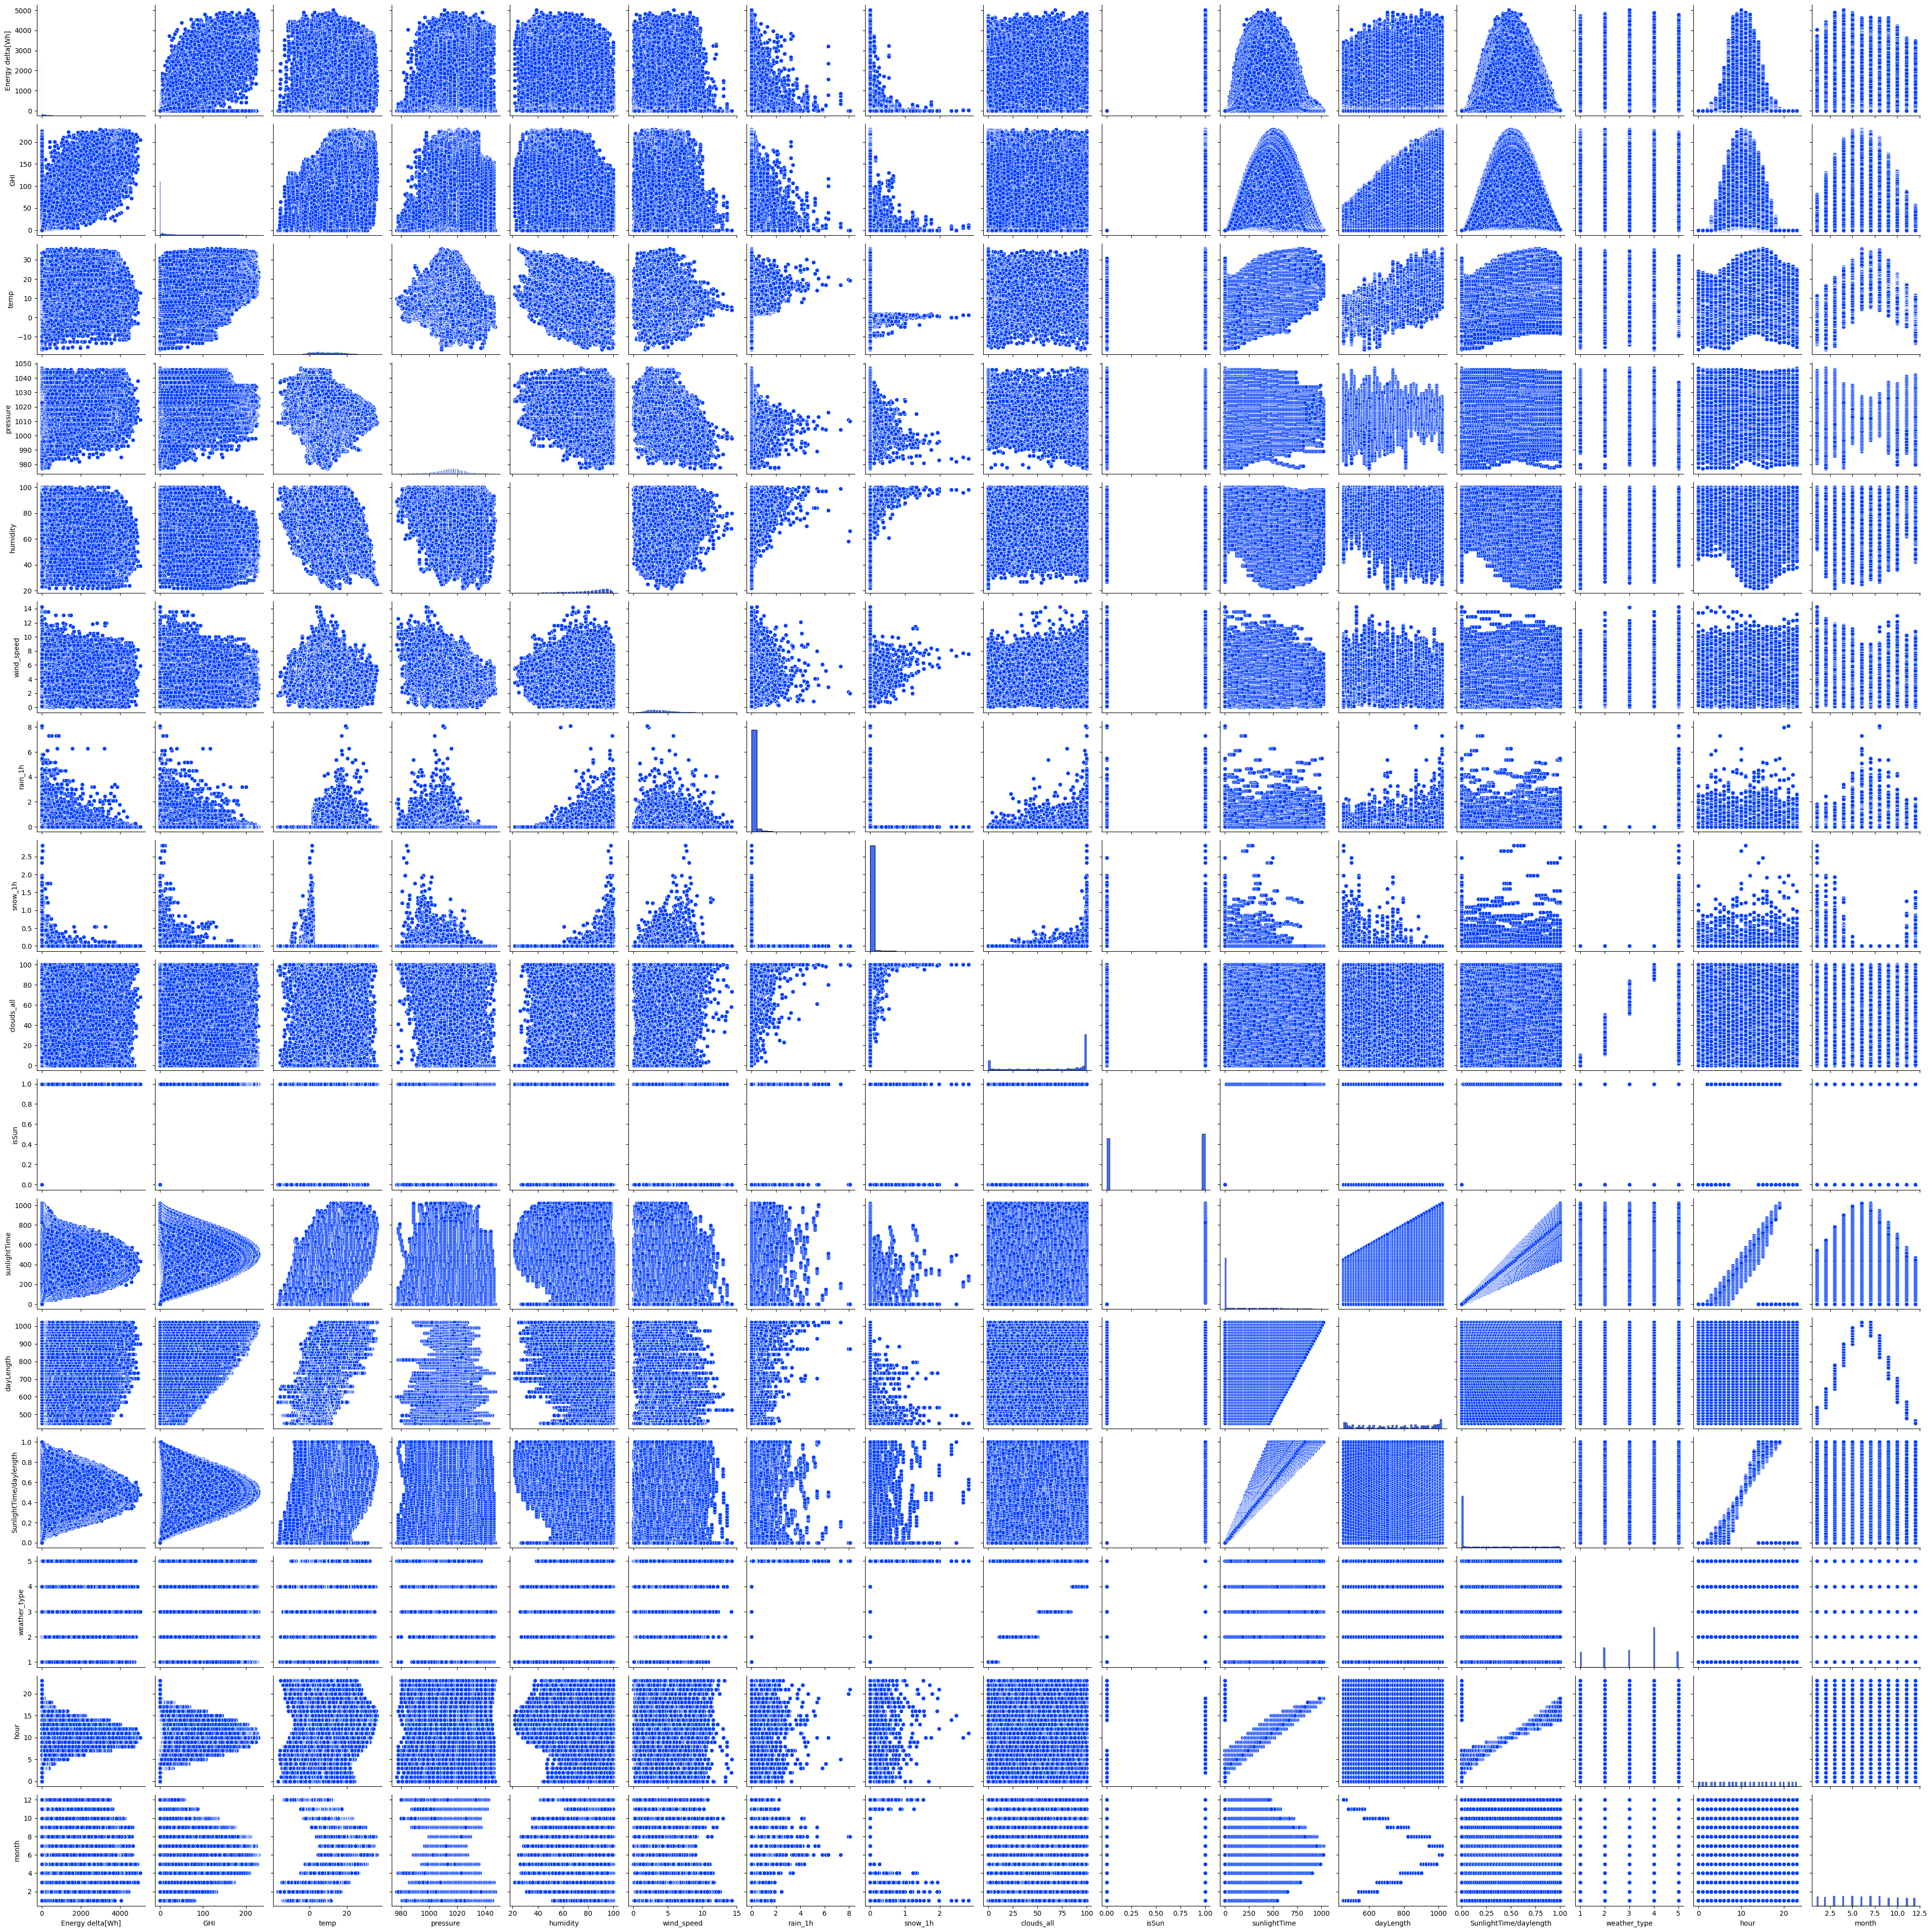

In [110]:
# Make a pairplot of the data
_ = sns.pairplot(df)

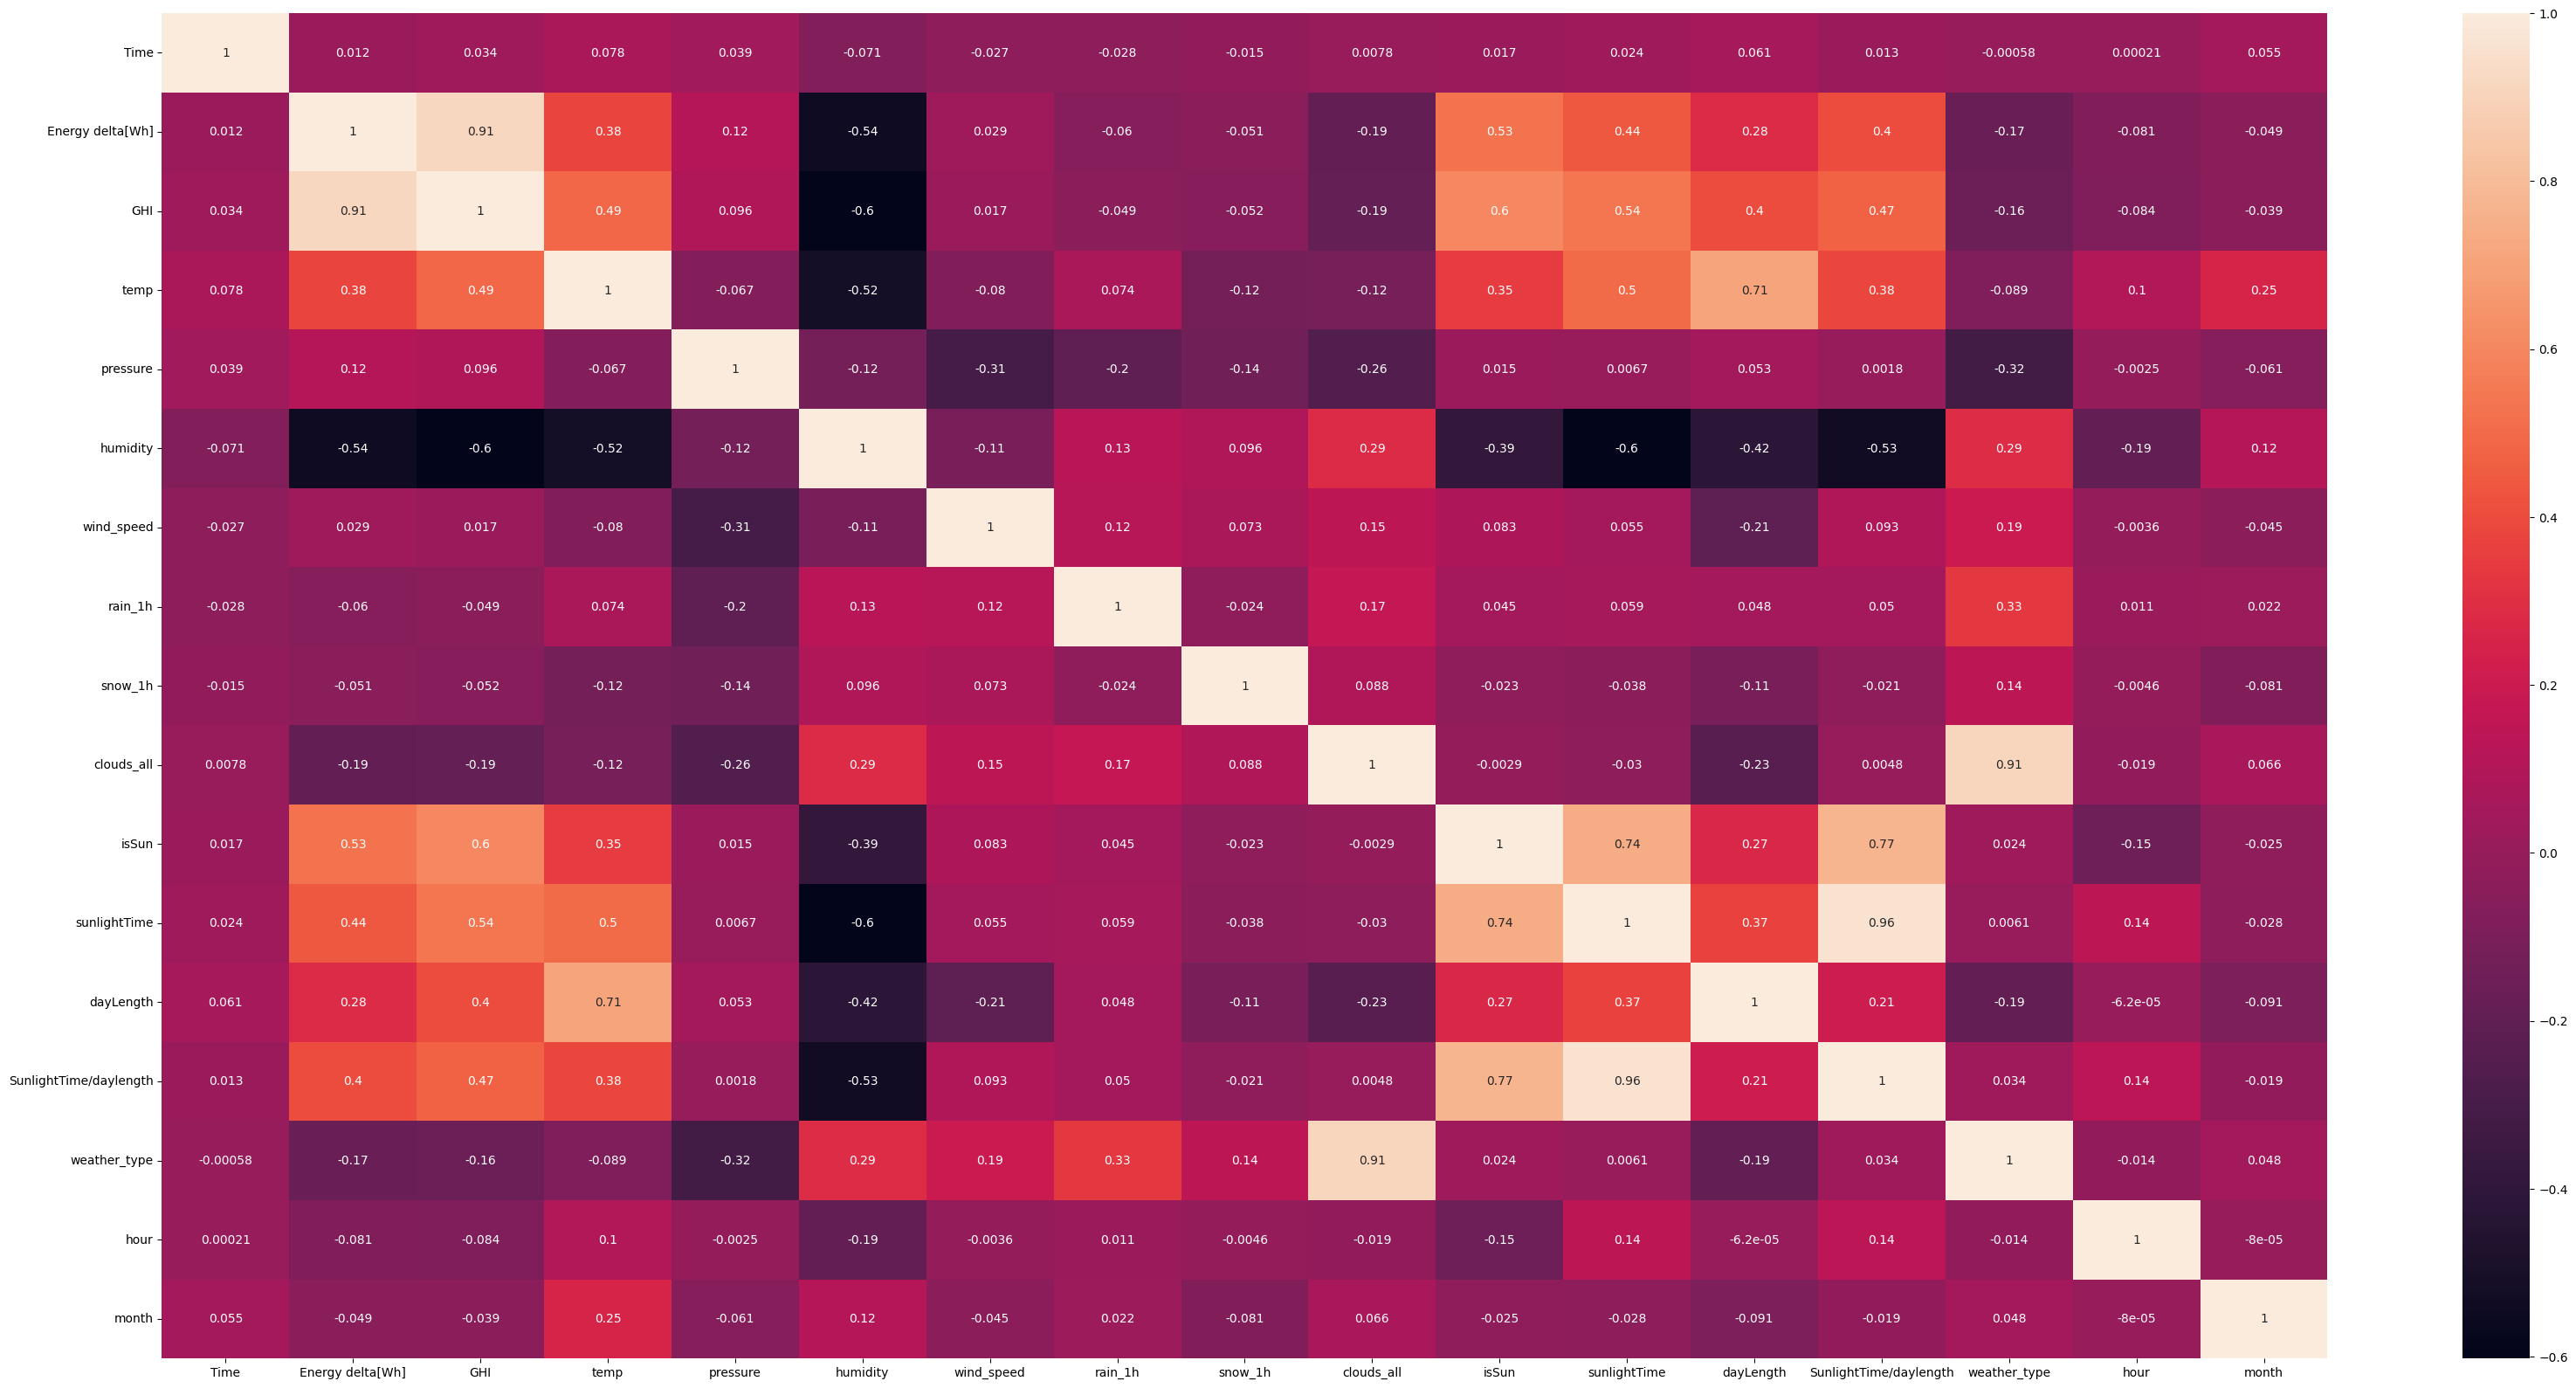

In [105]:
# Make a heatmap of the data 
_ = plt.figure(figsize=(40,20))
_ = sns.heatmap(df.corr(), annot=True)

There isn't any other clear high correlations with Energy usage other than Solar Irradiance (GHI) with a 91%. 

I selected some variables that I wanted to study closer below.

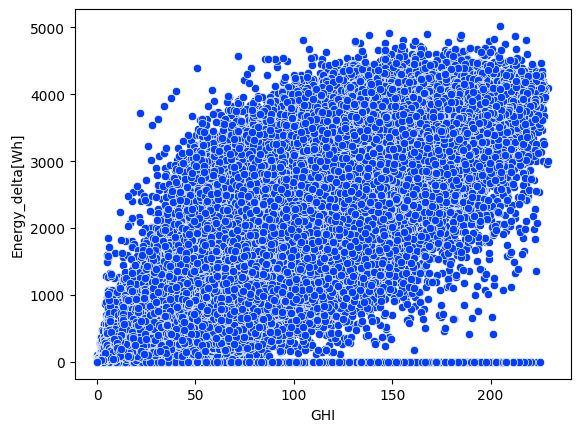

In [245]:
# Plot  Energy Usage against Solar Irradiance
_ = sns.scatterplot(x='GHI',y='Energy_delta[Wh]',data=df)

There is a clear positive correlation here between energy usage and sun radiation.

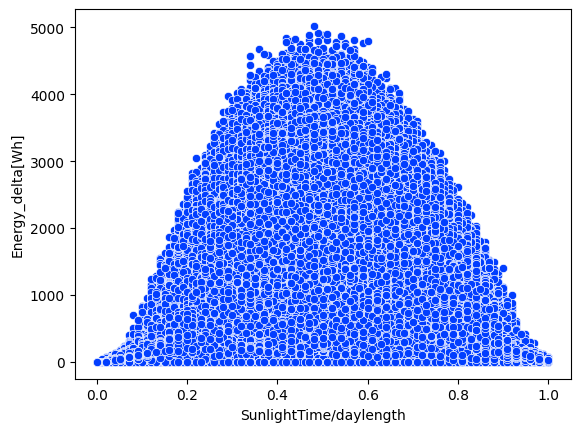

In [246]:
# Plot Energy Usage against sunlight time
_ = sns.scatterplot(x='SunlightTime/daylength',y='Energy_delta[Wh]',data=df)

The sunlight time divided by the day length together with hour of the day have a clear relationship with energy usage, there is a peak towards the middle of the day.

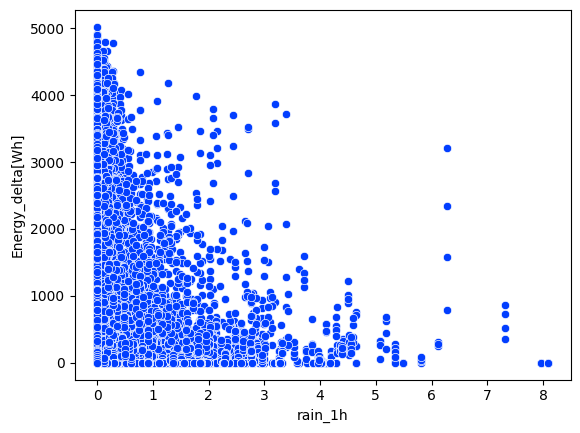

In [247]:
# Plot Energy Usage against Day Length
_ = sns.scatterplot(x='rain_1h',y='Energy_delta[Wh]',data=df)

Here you can see a negative relationship between energy usage and the amount of rain so as there is more rain there
is less energy usage

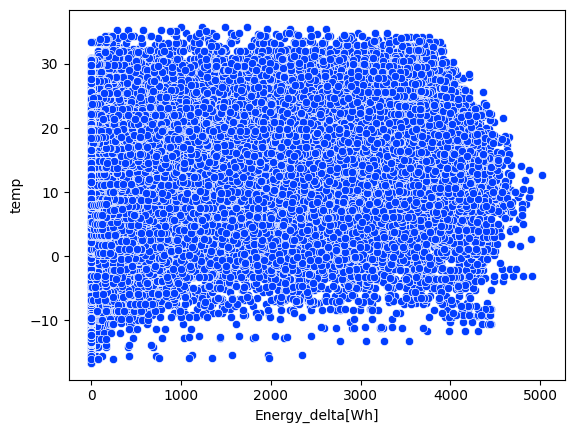

In [248]:
# Plot Energy Usage against Day Length
_ = sns.scatterplot(x='Energy_delta[Wh]',y='temp',data=df)

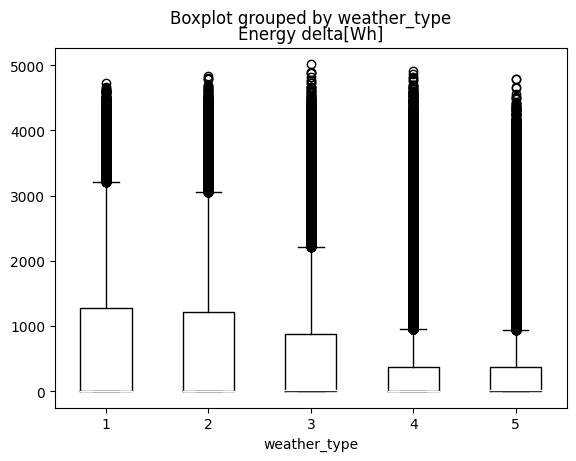

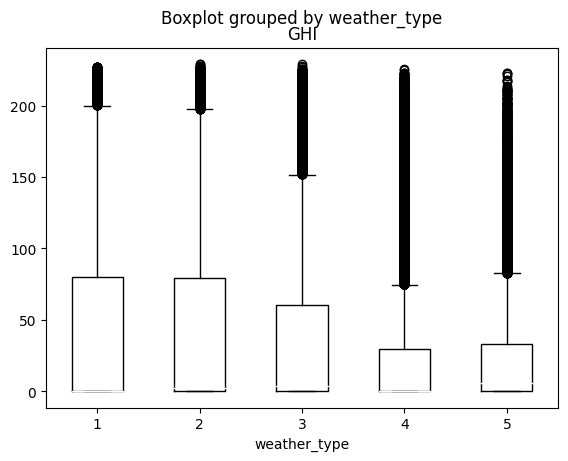

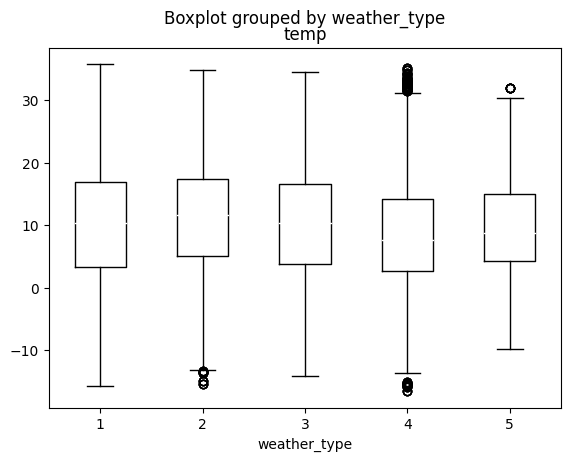

In [194]:
# Call the boxplot() method on our df.
_ = df.boxplot(by='weather_type', column='Energy delta[Wh]', grid=False, fontsize=10)
_ = df.boxplot(by='weather_type', column='GHI', grid=False, fontsize=10)
_ = df.boxplot(by='weather_type', column='temp', grid=False, fontsize=10)

The boxplots by weather type did not render much incite to better understand the trends in the data since the in terms of temperature the box showing between ther 25th and 75th percentile is very similar across weather types. Looking at energy usage and solar irradiance boxplots there is clearly a larger range of energy usage and solar irradiance for weather types 1, 2 and 3, whereas weather types 4 and 5 have a much lower range with the max being lower as well. 

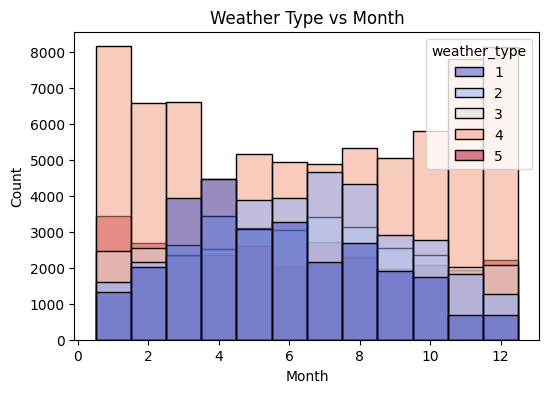

In [128]:
_ = plt.figure(figsize=(6,4))
_ = sns.histplot(x=df['month'], hue=df['weather_type'], palette='coolwarm', discrete=True)
_ = plt.title('Weather Type vs Month')
_ = plt.xlabel('Month')
_ = plt.ylabel('Count')

There is no information in the data source about what the each number of the weather type is so I'd like to try to figure it out with charts.

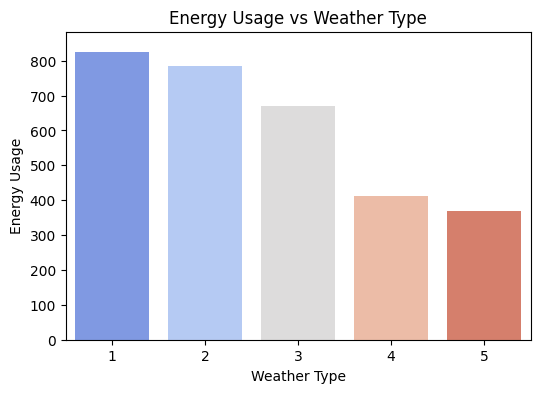

In [249]:
_ = plt.figure(figsize=(6,4))
_ = sns.barplot(x=df['weather_type'], y=df['Energy_delta[Wh]'],  palette='coolwarm', errwidth=0)
_ = plt.title('Energy Usage vs Weather Type')
_ = plt.xlabel('Weather Type')
_ = plt.ylabel('Energy Usage')


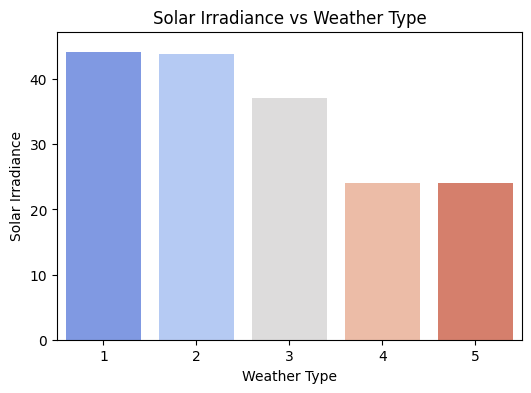

In [250]:
_ = plt.figure(figsize=(6,4))
_ = sns.barplot(x=df['weather_type'], y=df['GHI'],  palette='coolwarm', errwidth=0)
_ = plt.title('Solar Irradiance vs Weather Type')
_ = plt.xlabel('Weather Type')
_ = plt.ylabel('Solar Irradiance')

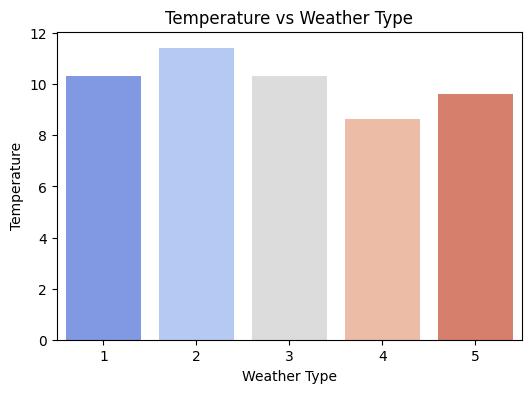

In [149]:
_ = plt.figure(figsize=(6,4))
_ = sns.barplot(x=df['weather_type'], y=df['temp'],  palette='coolwarm', errwidth=0)
_ = plt.title('Temperature vs Weather Type')
_ = plt.xlabel('Weather Type')
_ = plt.ylabel('Temperature')

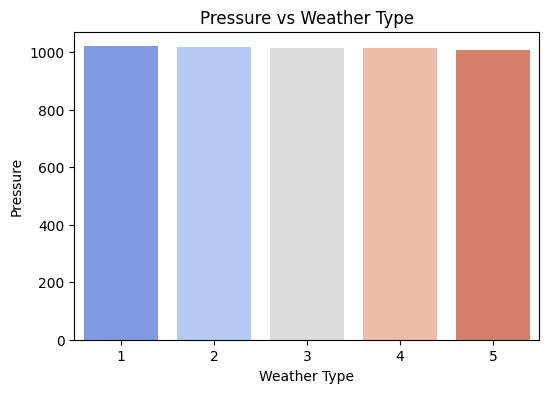

In [150]:
_ = plt.figure(figsize=(6,4))
_ = sns.barplot(x=df['weather_type'], y=df['pressure'],  palette='coolwarm', errwidth=0)
_ = plt.title('Pressure vs Weather Type')
_ = plt.xlabel('Weather Type')
_ = plt.ylabel('Pressure')

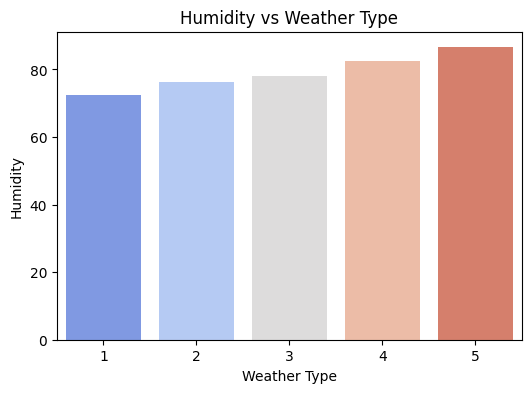

In [151]:
_ = plt.figure(figsize=(6,4))
_ = sns.barplot(x=df['weather_type'], y=df['humidity'],  palette='coolwarm', errwidth=0)
_ = plt.title('Humidity vs Weather Type')
_ = plt.xlabel('Weather Type')
_ = plt.ylabel('Humidity')

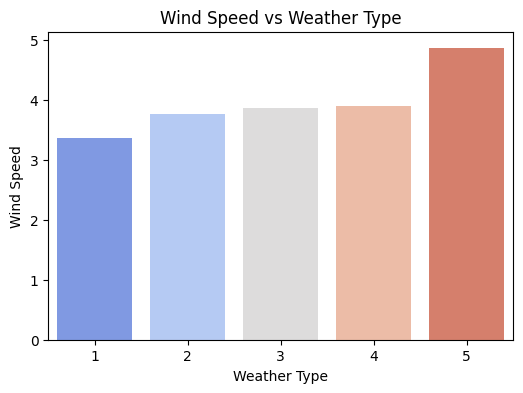

In [152]:
_ = plt.figure(figsize=(6,4))
_ = sns.barplot(x=df['weather_type'], y=df['wind_speed'],  palette='coolwarm', errwidth=0)
_ = plt.title('Wind Speed vs Weather Type')
_ = plt.xlabel('Weather Type')
_ = plt.ylabel('Wind Speed')

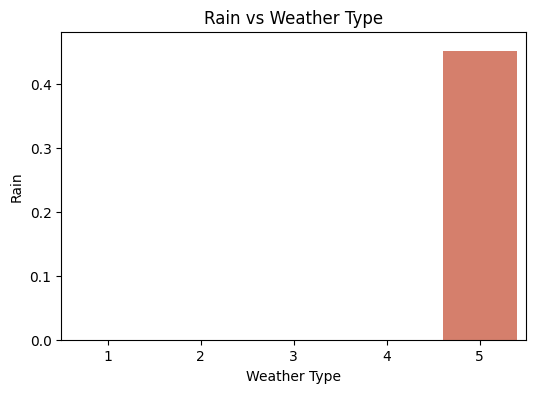

In [153]:
_ = plt.figure(figsize=(6,4))
_ = sns.barplot(x=df['weather_type'], y=df['rain_1h'],  palette='coolwarm', errwidth=0)
_ = plt.title('Rain vs Weather Type')
_ = plt.xlabel('Weather Type')
_ = plt.ylabel('Rain')

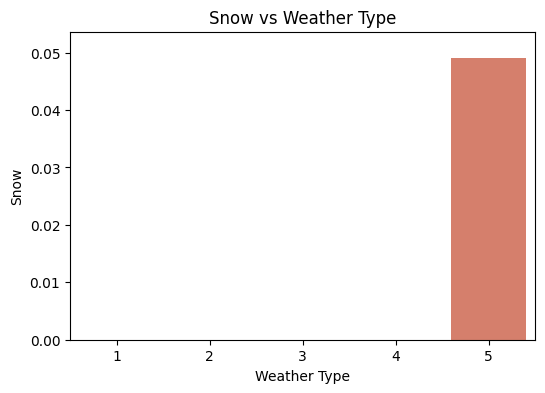

In [154]:
_ = plt.figure(figsize=(6,4))
_ = sns.barplot(x=df['weather_type'], y=df['snow_1h'],  palette='coolwarm', errwidth=0)
_ = plt.title('Snow vs Weather Type')
_ = plt.xlabel('Weather Type')
_ = plt.ylabel('Snow')

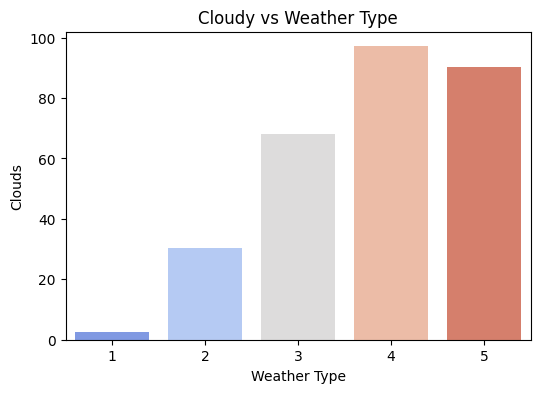

In [155]:
_ = plt.figure(figsize=(6,4))
_ = sns.barplot(x=df['weather_type'], y=df['clouds_all'],  palette='coolwarm', errwidth=0)
_ = plt.title('Cloudy vs Weather Type')
_ = plt.xlabel('Weather Type')
_ = plt.ylabel('Clouds')

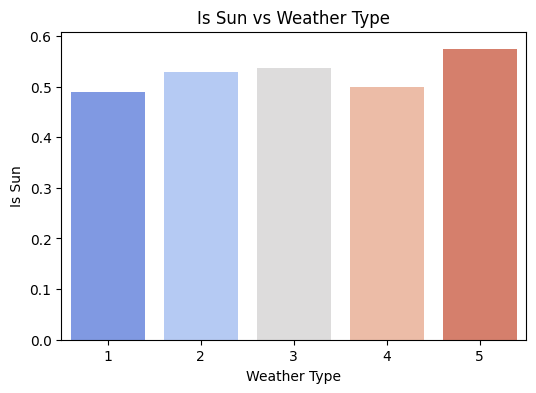

In [156]:
_ = plt.figure(figsize=(6,4))
_ = sns.barplot(x=df['weather_type'], y=df['isSun'],  palette='coolwarm', errwidth=0)
_ = plt.title('Is Sun vs Weather Type')
_ = plt.xlabel('Weather Type')
_ = plt.ylabel('Is Sun')

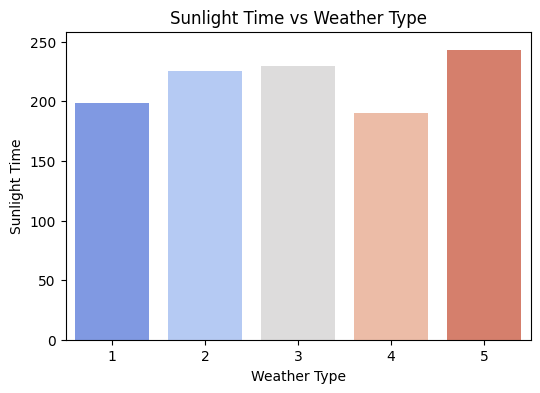

In [157]:
_ = plt.figure(figsize=(6,4))
_ = sns.barplot(x=df['weather_type'], y=df['sunlightTime'],  palette='coolwarm', errwidth=0)
_ = plt.title('Sunlight Time vs Weather Type')
_ = plt.xlabel('Weather Type')
_ = plt.ylabel('Sunlight Time')

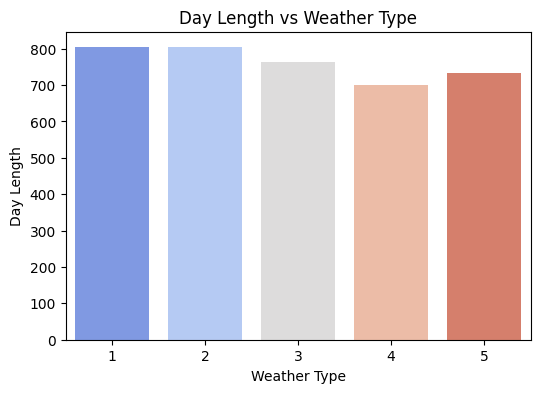

In [158]:
_ = plt.figure(figsize=(6,4))
_ = sns.barplot(x=df['weather_type'], y=df['dayLength'],  palette='coolwarm', errwidth=0)
_ = plt.title('Day Length vs Weather Type')
_ = plt.xlabel('Weather Type')
_ = plt.ylabel('Day Length')

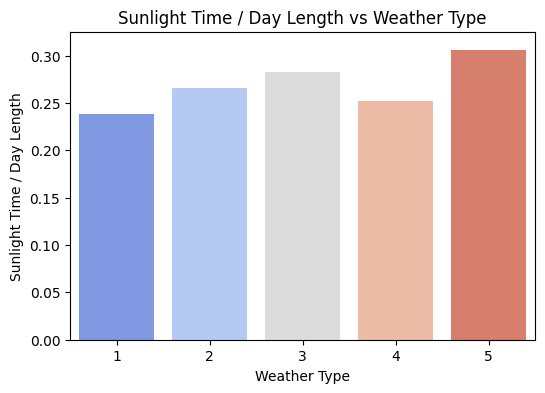

In [159]:
_ = plt.figure(figsize=(6,4))
_ = sns.barplot(x=df['weather_type'], y=df['SunlightTime/daylength'],  palette='coolwarm', errwidth=0)
_ = plt.title('Sunlight Time / Day Length vs Weather Type')
_ = plt.xlabel('Weather Type')
_ = plt.ylabel('Sunlight Time / Day Length')

It's unclear what the weather types are exactly. I was only able to decifer that weather type 5 includes snowy and rainy weather. 

Energy usage definitely declines from weather type 1 through weather type 5, with weather type 5 having the lowest usage of energy.

Solar Irradiance is almost twice as high in weather types 1 and 2 compared to types 4 and 5.

Weather type 5 experiences the highest wind speed.

It is cloudyest in weather types 4 and 5.

### Conclusion of the data visualization

Looking through the different information and graphs created, I would definitely use GHI (Solar Irradiance) and temperature to try explain the energy usage to be able investigate the opportunity of producing renewable energy based on weather patterns. When testing different models I would also include and try these different variables: wind speed, snow, rain and day length because of the results from looking at the different charts and information above. 

I'd like to explore further how the data is affected by looking at the subgroups of weather type and try and get more information from the data source provider. 